In [150]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [ ]:
!pip install -U langchain-openai

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from dotenv import load_dotenv
import os

openai_api_key = 'api키 넣기'
os.environ['OPENAI_API_KEY'] = openai_api_key


# 환경변수 로드(이부분은 별도로 환경변수 작업하)
# # 
# load_dotenv()
# api_key = os.getenv("OPENAI_API_KEY")
# if not api_key:
#     raise EnvironmentError("OPENAI_API_KEY가 설정되지 않았습니다.")



## Part1. 데이터 불러오기
- 데이터로드
- 데이터 정보를 이용하여서 gpt에게 데이터 분석에 필요한 작업지시서와, 분석 인사이트를 얻고자함

In [ ]:



try:
    # 현재 파일 경로 가져오기 (Jupyter Notebook 환경에서는 __file__을 사용할 수 없음)
    current_dir = r'C:\Users\Admin\Desktop\study_kpmg\data'
    
    # 엑셀 파일 경로 설정
    excel_path = os.path.join(current_dir, '서울시 문화행사 정보.csv')
    
    # 엑셀 파일 읽어오기
    df = pd.read_csv(excel_path, engine='python')  # openpyxl 엔진 지정
    print("데이터 로드 완료") 
    print(f"데이터 크기: {df.shape}")
    
    # 데이터 확인
    display(df.head(1))
    
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
except Exception as e:
    print(f"오류가 발생했습니다: {str(e)}")


데이터 로드 완료
데이터 크기: (5552, 23)


,번호,분류,자치구,공연_행사명,날짜_시간,장소,기관명,이용대상,이용요금,출연자정보,...,대표이미지,신청일,시민_기관,시작일,종료일,테마분류,경도_X좌표_,위도_Y좌표_,유무료,문화포털상세URL
0,1,전시/미술,강남구,K-일러스트레이션페어 서울 2025,2025-02-06~2025-02-09,서울 삼성동 코엑스 3층 D홀,기타,누구나,"사전 예매가 : ~ 2025년 1월 31일(금)까지 결제 시 8,000원ㅣ현장 구매...",NaN,...,https://culture.seoul.go.kr/cmmn/file/getImage...,2024-11-22,기관,00:00.0,00:00.0,기타,127.059159,37.511824,유료,https://culture.seoul.go.kr/culture/culture/cu...


In [22]:
# LangChain 설정
llm = ChatOpenAI(temperature=0.7)
prompt = PromptTemplate(
    input_variables=["data_summary"],
    template="""\
    데이터 요약:
    {data_summary}

    위 데이터를 기반으로 중요한 인사이트를 도출하고, 2024년도서울시문화행사 보고서에 필요한 데이터 결합, 생성, 분석에 대한 작업을 제시해줘
    """
)
chain = LLMChain(llm=llm, prompt=prompt)
myPrompt=df
langchain_response = chain.run(data_summary=myPrompt)
print('-->\n',langchain_response)

-->
 1. 각 자치구별로 문화행사의 개최 횟수를 분석하여 문화 행사 활성화 정도를 파악할 수 있습니다. 이를 통해 어떤 자치구에서 문화 행사가 활발히 이루어지고 있는지를 알 수 있습니다.

2. 각 자치구별로 유료와 무료 문화행사의 비율을 분석하여 해당 지역의 문화 행사 참여 형태를 이해할 수 있습니다. 이를 통해 자치구별 문화 소비 성향을 파악할 수 있습니다.

3. 각 자치구별로 문화 행사의 참여 대상을 분석하여 어떤 연령층이 주로 문화 행사에 참여하는지를 파악할 수 있습니다. 이를 통해 해당 자치구의 문화 행사 대상 층을 고려한 행사 기획이 가능합니다.

4. 날짜별로 문화 행사의 개최 횟수를 분석하여 행사 시기에 대한 인사이트를 도출할 수 있습니다. 특정 시기에 문화 행사가 집중적으로 열리는 경향을 파악할 수 있습니다.

5. 기관명을 통해 문화 행사를 주관하는 주체를 파악하여 해당 기관의 활동 범위와 특성을 이해할 수 있습니다. 이를 통해 향후 협력 가능성을 모색할 수 있습니다.

위의 분석을 통해 2024년도 서울시 문화행사 보고서에 필요한 데이터를 결합하여 구체적인 분석 결과와 인사이트를 제시할 수 있습니다.


In [28]:
# LangChain 설정
llm = ChatOpenAI(temperature=0.7)
prompt = PromptTemplate(
    input_variables=["data_summary"],
    template="""\
    데이터 요약:
    {data_summary}

    위 데이터는 공간복잡도를 계산하여 혼잡도 분산을 위해 사용하는 기초데이터이다.
    혼잡도 분석에 필요한 2024년도서울시문화행사.csv 데이터에서 데이터 결합, 생성, 분석에 대한 작업을 최소 10개는 제시해줘
    파이썬 코드없이, 
    """
)
chain = LLMChain(llm=llm, prompt=prompt)
myPrompt=df
langchain_response = chain.run(data_summary=myPrompt)
print('-->\n',langchain_response)

-->
 1. 자치구별로 공연/행사 개최 횟수를 카운트하여 시각화
2. 공연/행사명에서 특정 키워드(예: 뮤지컬)가 포함된 행사만 필터링
3. 날짜_시간 컬럼을 활용하여 월별로 공연/행사 개최 횟수를 카운트하여 시각화
4. 이용대상별로 공연/행사 개최 횟수를 카운트하여 시각화
5. 이용요금 정보를 바탕으로 무료와 유료 공연/행사의 비율을 계산
6. 장소별로 공연/행사 개최 횟수를 카운트하여 시각화
7. 공연/행사의 테마분류별로 개최 횟수를 카운트하여 시각화
8. 경도_X좌표, 위도_Y좌표를 활용하여 지도상에 공연/행사 위치를 표시
9. 시작일과 종료일을 활용하여 공연/행사 기간을 계산하여 평균 공연 기간을 구함
10. 문화포털상세URL을 활용하여 각 공연/행사의 상세 정보 링크를 제공


In [46]:
# LangChain 설정
result=''
for x in range(5):
    # print('-'*100)
    llm = ChatOpenAI(temperature=0.7)
    prompt = PromptTemplate(
        input_variables=["data_summary"],
        template="""\
        데이터 요약:
        {data_summary}
        {data_prompt}
        """
    )
    chain = LLMChain(llm=llm, prompt=prompt)
    input_prompt='''위 데이터는 공간복잡도를 계산하여 혼잡도 분산을 위해 사용하는 기초데이터이다.
                    혼잡도 분석에 필요한 2024년도서울시문화행사.csv 데이터에서 데이터 결합, 생성, 분석에 대한 작업을 최소 10개는 제시해줘
                    파이썬 코드없이'''
    myPrompt=df
    langchain_response = chain.run(data_summary=myPrompt, data_prompt=input_prompt)
    result+='\n'+langchain_response
result

"\n1. 자치구별로 공연_행사명의 개수를 계산한다.\n2. 자치구별로 유무료 공연의 비율을 계산한다.\n3. 공연_행사명에 '클래식'이 포함된 행사의 개수를 계산한다.\n4. 날짜_시간을 기준으로 2024년에 개최된 공연의 개수를 계산한다.\n5. 이용대상이 '누구나'인 공연의 개수를 계산한다.\n6. 이용요금이 NaN인 공연의 개수를 계산한다.\n7. 이용요금이 있는 공연 중 가장 높은 요금을 확인한다.\n8. 기관명이 '기관'인 공연의 개수를 계산한다.\n9. 출연자정보가 NaN인 공연의 개수를 계산한다.\n10. 테마분류가 NaN인 공연의 개수를 계산한다.\n1. 자치구별로 공연/행사 개수를 집계하여 분포를 확인한다.\n2. 공연/행사명의 문자열 길이를 계산하여 평균값, 최대값, 최소값을 확인한다.\n3. 날짜_시간을 기준으로 연도별 공연/행사 개수를 시계열 그래프로 시각화한다.\n4. 이용대상별로 공연/행사 개수를 집계하여 분포를 확인한다.\n5. 이용요금의 결측치를 처리하고, 유료와 무료의 비율을 확인한다.\n6. 공연/행사명에 특정 단어가 포함된 행을 필터링하여 확인한다.\n7. 장소별로 공연/행사 개수를 집계하여 분포를 확인한다.\n8. 시작일과 종료일을 활용하여 공연/행사 기간을 계산하고, 평균값을 확인한다.\n9. 이용대상과 이용요금을 결합하여 성인 대상의 평균 이용요금을 계산한다.\n10. 경도_X좌표와 위도_Y좌표를 이용하여 지도에 공연/행사 위치를 표시한다.\n1. 자치구별로 공연/행사 개최 횟수를 계산\n2. 자치구별로 유료/무료 행사 개최 비율을 계산\n3. 자치구별로 평균 이용료를 계산\n4. 공연/행사 분류별로 개최 횟수를 계산\n5. 요일별로 공연/행사 개최 횟수를 계산\n6. 월별로 공연/행사 개최 횟수를 계산\n7. 공연/행사 장소별로 개최 횟수를 계산\n8. 공연/행사 시작 시간대별로 개최 횟수를 계산\n9. 공연/행사 종료 시간대별로 개최 횟수를 계산\n10. 공연/행사 기관명별로 개최 횟수를 계산\n1. 각 자치구별로 

In [47]:
result.split('\n')

['',
 '1. 자치구별로 공연_행사명의 개수를 계산한다.',
 '2. 자치구별로 유무료 공연의 비율을 계산한다.',
 "3. 공연_행사명에 '클래식'이 포함된 행사의 개수를 계산한다.",
 '4. 날짜_시간을 기준으로 2024년에 개최된 공연의 개수를 계산한다.',
 "5. 이용대상이 '누구나'인 공연의 개수를 계산한다.",
 '6. 이용요금이 NaN인 공연의 개수를 계산한다.',
 '7. 이용요금이 있는 공연 중 가장 높은 요금을 확인한다.',
 "8. 기관명이 '기관'인 공연의 개수를 계산한다.",
 '9. 출연자정보가 NaN인 공연의 개수를 계산한다.',
 '10. 테마분류가 NaN인 공연의 개수를 계산한다.',
 '1. 자치구별로 공연/행사 개수를 집계하여 분포를 확인한다.',
 '2. 공연/행사명의 문자열 길이를 계산하여 평균값, 최대값, 최소값을 확인한다.',
 '3. 날짜_시간을 기준으로 연도별 공연/행사 개수를 시계열 그래프로 시각화한다.',
 '4. 이용대상별로 공연/행사 개수를 집계하여 분포를 확인한다.',
 '5. 이용요금의 결측치를 처리하고, 유료와 무료의 비율을 확인한다.',
 '6. 공연/행사명에 특정 단어가 포함된 행을 필터링하여 확인한다.',
 '7. 장소별로 공연/행사 개수를 집계하여 분포를 확인한다.',
 '8. 시작일과 종료일을 활용하여 공연/행사 기간을 계산하고, 평균값을 확인한다.',
 '9. 이용대상과 이용요금을 결합하여 성인 대상의 평균 이용요금을 계산한다.',
 '10. 경도_X좌표와 위도_Y좌표를 이용하여 지도에 공연/행사 위치를 표시한다.',
 '1. 자치구별로 공연/행사 개최 횟수를 계산',
 '2. 자치구별로 유료/무료 행사 개최 비율을 계산',
 '3. 자치구별로 평균 이용료를 계산',
 '4. 공연/행사 분류별로 개최 횟수를 계산',
 '5. 요일별로 공연/행사 개최 횟수를 계산',
 '6. 월별로 공연/행사 개최 횟수를 계산',
 '7. 공연/행사 장소별로 개최 횟수를 계산',
 '8. 공연/행사 시작

In [106]:
llm = ChatOpenAI(temperature=0.7)
prompt = PromptTemplate(
input_variables=["data_summary"],
template="""\
        데이터 요약:
        {data_summary}
        {data_prompt}
        """
    )
chain = LLMChain(llm=llm, prompt=prompt)

In [ ]:


input_prompt='''위 데이터의 30개의 항목에서 중복을 제거하고, 
                유사한 항목을 통합한 후 고유한 10개 항목의 분석 작업으로 구성해줘'''
myPrompt=result.split('\n')
langchain_response = chain.run(data_summary=myPrompt, data_prompt=input_prompt)
langchain_response

'1. 자치구별로 공연/행사 개최 횟수를 계산\n2. 자치구별로 유료/무료 행사 개최 비율을 계산\n3. 날짜_시간을 기준으로 연도별 공연/행사 개수를 시계열 그래프로 시각화\n4. 이용대상별로 공연/행사 개최 횟수를 계산\n5. 이용요금의 결측치를 처리하고, 유료와 무료의 비율을 확인\n6. 공연/행사명에 특정 단어가 포함된 행을 필터링하여 확인\n7. 장소별로 공연/행사 개최 횟수를 계산\n8. 시작일과 종료일을 활용하여 공연/행사 기간을 계산하고, 평균값을 확인\n9. 이용대상과 이용요금을 결합하여 성인 대상의 평균 이용요금을 계산\n10. 경도_X좌표와 위도_Y좌표를 이용하여 지도에 공연/행사 위치를 표시'

In [58]:
result2=langchain_response.split('\n')
result2

['1. 자치구별로 공연/행사 개최 횟수를 계산',
 '2. 자치구별로 유료/무료 행사 개최 비율을 계산',
 '3. 날짜_시간을 기준으로 연도별 공연/행사 개수를 시계열 그래프로 시각화',
 '4. 이용대상별로 공연/행사 개최 횟수를 계산',
 '5. 이용요금의 결측치를 처리하고, 유료와 무료의 비율을 확인',
 '6. 공연/행사명에 특정 단어가 포함된 행을 필터링하여 확인',
 '7. 장소별로 공연/행사 개최 횟수를 계산',
 '8. 시작일과 종료일을 활용하여 공연/행사 기간을 계산하고, 평균값을 확인',
 '9. 이용대상과 이용요금을 결합하여 성인 대상의 평균 이용요금을 계산',
 '10. 경도_X좌표와 위도_Y좌표를 이용하여 지도에 공연/행사 위치를 표시']

In [60]:
input_prompt='''위 데이터의 각 항목당 얻을수 있는 인사이트에 대해 도출해줘'''
myPrompt=result2
langchain_response = chain.run(data_summary=myPrompt, data_prompt=input_prompt)
langchain_response.split('\n')

['1. 자치구별로 공연/행사 개최 횟수를 계산: 각 자치구가 문화 및 이벤트 활동에 얼마나 많이 참여하고 있는지를 파악할 수 있음.',
 '2. 자치구별로 유료/무료 행사 개최 비율을 계산: 각 자치구에서 유료와 무료 행사가 어떻게 분포되어 있는지를 확인할 수 있음.',
 '3. 날짜_시간을 기준으로 연도별 공연/행사 개수를 시계열 그래프로 시각화: 시간에 따른 공연/행사의 변화 추이를 쉽게 파악할 수 있음.',
 '4. 이용대상별로 공연/행사 개최 횟수를 계산: 공연/행사를 어떤 대상을 대상으로 진행하는지에 대한 정보를 얻을 수 있음.',
 '5. 이용요금의 결측치를 처리하고, 유료와 무료의 비율을 확인: 공연/행사의 유료와 무료 비율을 파악하여 참가자들이 지불하는 요금에 대한 인사이트를 얻을 수 있음.',
 '6. 공연/행사명에 특정 단어가 포함된 행을 필터링하여 확인: 특정 주제나 키워드에 대한 공연/행사가 어떻게 분포되어 있는지를 파악할 수 있음.',
 '7. 장소별로 공연/행사 개최 횟수를 계산: 어떤 장소가 가장 많은 공연/행사를 개최하는지를 확인할 수 있음.',
 '8. 시작일과 종료일을 활용하여 공연/행사 기간을 계산하고, 평균값을 확인: 공연/행사의 기간에 대한 통계를 통해 어떤 종류의 이벤트가 얼마나 지속되는지를 파악할 수 있음.',
 '9. 이용대상과 이용요금을 결합하여 성인 대상의 평균 이용요금을 계산: 성인 대상의 평균 이용요금을 파악하여 해당 대상의 이벤트 참여 성향을 이해할 수 있음.',
 '10. 경도_X좌표와 위도_Y좌표를 이용하여 지도에 공연/행사 위치를 표시: 공연/행사의 지리적 분포를 시각적으로 확인하여 어떤 지역에서 활발하게 문화활동이 이루어지고 있는지를 파악할 수 있음.']

In [64]:
input_prompt='''위 데이터의 각 항목당 얻을수 있는 인사이트에 대해 혼잡도 분산과 연관하여서 도출해줘'''
myPrompt=result2
langchain_response = chain.run(data_summary=myPrompt, data_prompt=input_prompt)
langchain_response.split('\n')

['1. 자치구별로 공연/행사 개최 횟수를 계산',
 '   - 인사이트: 어떤 자치구에서 가장 많은 공연/행사가 개최되는지 파악 가능',
 '   - 혼잡도: 공연/행사가 많이 열리는 자치구는 혼잡도가 높을 수 있음',
 '',
 '2. 자치구별로 유료/무료 행사 개최 비율을 계산',
 '   - 인사이트: 각 자치구에서 어떤 유형의 행사가 주로 열리는지 파악 가능',
 '   - 혼잡도: 유료 행사가 많은 자치구는 혼잡도가 높을 수 있음',
 '',
 '3. 날짜_시간을 기준으로 연도별 공연/행사 개수를 시계열 그래프로 시각화',
 '   - 인사이트: 연도별로 공연/행사의 추세를 파악 가능',
 '   - 혼잡도: 특정 연도에 공연/행사가 집중적으로 열릴 경우 해당 시기의 혼잡도가 높을 수 있음',
 '',
 '4. 이용대상별로 공연/행사 개최 횟수를 계산',
 '   - 인사이트: 어떤 이용대상을 대상으로 한 공연/행사가 많이 열리는지 파악 가능',
 '   - 혼잡도: 특정 이용대상을 대상으로 한 공연/행사가 많을 경우 해당 장소의 혼잡도가 높을 수 있음',
 '',
 '5. 이용요금의 결측치를 처리하고, 유료와 무료의 비율을 확인',
 '   - 인사이트: 공연/행사의 유료와 무료 비율을 파악하여 이용자들의 경제적 특성을 이해 가능',
 '   - 혼잡도: 유료 행사가 많은 경우 해당 장소의 혼잡도가 높을 수 있음',
 '',
 '6. 공연/행사명에 특정 단어가 포함된 행을 필터링하여 확인',
 '   - 인사이트: 특정 주제나 관심사를 가진 이용자들을 대상으로 한 행사가 어디서 열리는지 파악 가능',
 '   - 혼잡도: 특정 주제에 관련된 공연/행사가 많으면 해당 장소의 혼잡도가 높을 수 있음',
 '',
 '7. 장소별로 공연/행사 개최 횟수를 계산',
 '   - 인사이트: 어떤 장소에서 공연/행사가 가장 많이 열리는지 파악 가능',
 '   - 혼잡도: 공연/행사가 많이 열리는 장소는 혼잡도가 높을 수 있음',
 '',
 '8. 시작일과 종

## Part2. gpt의 질의어로 데이터 분석하기
- 판다스 AI로 작업하고자함.


In [99]:
df.columns

Index(['번호', '분류', '자치구', '공연_행사명', '날짜_시간', '장소', '기관명', '이용대상', '이용요금',
       '출연자정보', '프로그램소개', '기타내용', '홈페이지_주소', '대표이미지', '신청일', '시민_기관', '시작일',
       '종료일', '테마분류', '경도_X좌표_', '위도_Y좌표_', '유무료', '문화포털상세URL'],
      dtype='object')

In [69]:
result2

['1. 자치구별로 공연/행사 개최 횟수를 계산',
 '2. 자치구별로 유료/무료 행사 개최 비율을 계산',
 '3. 날짜_시간을 기준으로 연도별 공연/행사 개수를 시계열 그래프로 시각화',
 '4. 이용대상별로 공연/행사 개최 횟수를 계산',
 '5. 이용요금의 결측치를 처리하고, 유료와 무료의 비율을 확인',
 '6. 공연/행사명에 특정 단어가 포함된 행을 필터링하여 확인',
 '7. 장소별로 공연/행사 개최 횟수를 계산',
 '8. 시작일과 종료일을 활용하여 공연/행사 기간을 계산하고, 평균값을 확인',
 '9. 이용대상과 이용요금을 결합하여 성인 대상의 평균 이용요금을 계산',
 '10. 경도_X좌표와 위도_Y좌표를 이용하여 지도에 공연/행사 위치를 표시']

In [112]:
# 판다스를 활용하여 자치구별 유무료 개최 횟수를 계산
grouped_df = df.groupby(['자치구']).size().reset_index(name='개최 횟수')
input_prompt='''이 데이터를 분석하여 아래의 질문에 답하세요:
1. 어떤 자치구가 가장 많은 행사를 개최했나요?
2. 이데이터와 연결해야 하는 외부데이터는 어떤 자료가 있을까요?
3.  비율을 계산하여 자치구별로 개최횟수와 비율을 표시해줘
4. 결과를 통해 얻을수 있는 인사이트를 최대한 자세하고 다양하게 '''

myPrompt=grouped_df
langchain_response = chain.run(data_summary=myPrompt, data_prompt=input_prompt)
langchain_response.split('\n')

['1. 종로구가 가장 많은 행사를 개최했습니다. 총 1371번의 행사를 개최했습니다.',
 '2. 이 데이터와 연결할 수 있는 외부 데이터로는 해당 자치구의 인구 통계, 관광객 수, 지역 경제 지표 등이 있을 수 있습니다. 이러한 데이터를 분석하면 행사 개최와 관련된 다양한 요소들을 파악할 수 있을 것입니다.',
 '3. 아래는 각 자치구별 행사 개최 횟수와 비율을 나타낸 표입니다.',
 '',
 '| 자치구 | 행사 개최 횟수 | 비율 |',
 '|-------|--------------|------|',
 '| 강남구 | 202          | 7.69%  |',
 '| 강동구 | 89           | 3.39%  |',
 '| 강북구 | 254          | 9.68%  |',
 '| 강서구 | 80           | 3.05%  |',
 '| 관악구 | 99           | 3.77%  |',
 '| 광진구 | 165          | 6.29%  |',
 '| 구로구 | 233          | 8.88%  |',
 '| 금천구 | 48           | 1.83%  |',
 '| 노원구 | 231          | 8.79%  |',
 '| 도봉구 | 88           | 3.35%  |',
 '| 동대문구 | 213        | 8.11%  |',
 '| 동작구 | 48           | 1.83%  |',
 '| 마포구 | 282          | 10.74% |',
 '| 서대문구 | 40         | 1.52%  |',
 '| 서초구 | 241          | 9.18%  |',
 '| 성동구 | 216          | 8.22%  |',
 '| 성북구 | 157          | 5.98%  |',
 '| 송파구 | 271          | 10.32% |',
 '| 양천구 | 78           | 2.97%  |',
 '| 영등포구 | 96         | 3.66% 

In [113]:
# 판다스를 활용하여 자치구별 유무료 개최 횟수를 계산
grouped_df = df.groupby(['자치구', '유무료']).size().reset_index(name='개최 횟수')

input_prompt='''이 데이터를 분석하여 아래의 질문에 답하세요:
1. 어떤 자치구가 가장 많은 무료 행사를 개최했나요?
2. 유료 행사가 가장 많은 자치구는 어디인가요?
3. 무료와 유료 행사의 비율을 계산하여 자치구별로 요약해서 데이터프레임으로 표시
4. 결과를 통해 얻을수 있는 인사이트를 최대한 자세하고 다양하게 '''
myPrompt=grouped_df
langchain_response = chain.run(data_summary=myPrompt, data_prompt=input_prompt)
langchain_response.split('\n')

['1. 종로구가 가장 많은 무료 행사를 개최했습니다. 종로구는 총 734번의 무료 행사를 개최했습니다.',
 '',
 '2. 유료 행사가 가장 많은 자치구는 강북구입니다. 강북구는 총 145번의 유료 행사를 개최했습니다.',
 '',
 '3. 무료와 유료 행사의 비율을 계산하여 자치구별로 요약한 데이터프레임은 아래와 같습니다:',
 '',
 '| 자치구  | 무료 행사 횟수 | 유료 행사 횟수 | 무료/유료 비율 |',
 '|--------|--------------|--------------|--------------|',
 '| 강남구 | 127          | 75           | 1.69         |',
 '| 강동구 | 23           | 66           | 0.35         |',
 '| 강북구 | 109          | 145          | 0.75         |',
 '| 강서구 | 35           | 45           | 0.78         |',
 '| 관악구 | 73           | 26           | 2.81         |',
 '| 광진구 | 81           | 84           | 0.96         |',
 '| 구로구 | 111          | 122          | 0.91         |',
 '| 금천구 | 36           | 12           | 3.00         |',
 '| 노원구 | 181          | 50           | 3.62         |',
 '| 도봉구 | 80           | 8            | 10.00        |',
 '| 동대문구 | 168         | 45           | 3.73         |',
 '| 동작구 | 47           | 1            | 47.00        |',
 '| 마포구 | 179     

In [ ]:
#####################################
# pandas_gpt를 이용한 작업
# https://normalstory.tistory.com/entry/Pandas-AI-%ED%8C%90%EB%8B%A4%EC%8A%A4AI-with-LLM-Agent-OpenAI-MySQL

%pip install -q pandasai
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

df_Ai = SmartDataframe(df, config={"llm": llm})
df_Ai

Note: you may need to restart the kernel to use updated packages.


In [124]:
result2

['1. 자치구별로 공연/행사 개최 횟수를 계산',
 '2. 자치구별로 유료/무료 행사 개최 비율을 계산',
 '3. 날짜_시간을 기준으로 연도별 공연/행사 개수를 시계열 그래프로 시각화',
 '4. 이용대상별로 공연/행사 개최 횟수를 계산',
 '5. 이용요금의 결측치를 처리하고, 유료와 무료의 비율을 확인',
 '6. 공연/행사명에 특정 단어가 포함된 행을 필터링하여 확인',
 '7. 장소별로 공연/행사 개최 횟수를 계산',
 '8. 시작일과 종료일을 활용하여 공연/행사 기간을 계산하고, 평균값을 확인',
 '9. 이용대상과 이용요금을 결합하여 성인 대상의 평균 이용요금을 계산',
 '10. 경도_X좌표와 위도_Y좌표를 이용하여 지도에 공연/행사 위치를 표시']

In [ ]:
# 에러나오면 다시 실행해봄
###############################3
## 판다스_gpt
# https://calmmimiforest.tistory.com/125
pandasMsg=result2[3]  # 0번부터 시작함으로 원하는 질문에서 번호-1
print('\n-->',pandasMsg)
tmp=df_Ai.chat(pandasMsg)
tmp


--> 4. 이용대상별로 공연/행사 개최 횟수를 계산


,이용대상,이벤트 개최 횟수
0,누구나,1152
1,전체관람가,287
2,시민 누구나,280
3,성인,183
4,초등학생 이상,109
...,...,...
1696,7세 이상 관람가능(2017년생),1
1697,4세 이상 관람가,1
1698,상권 이용 고객이라면 누구나,1
1699,구직을 희망하는 여성 누구나,1


In [ ]:
##########################
## 일반 gpt(랭체인) 연결
###########################
input_prompt='''이 데이터를 분석하여 아래의 질문에 답하세요:
 결과를 통해 얻을수 있는 인사이트를 최대한 자세하고 다양하게 '''
myPrompt=tmp

langchain_response = chain.run(data_summary=myPrompt, data_prompt=input_prompt)
langchain_response.split('\n')

['1. 이벤트 개최 횟수가 가장 많은 이용대상은 누구인가?',
 '- 이벤트 개최 횟수가 가장 많은 이용대상은 "누구나"이다. 이용대상이 가장 넓은 범위를 가지고 있기 때문에 이벤트에 참여하는 사람들이 많을 것으로 추정할 수 있다.',
 '',
 '2. 이벤트 개최 횟수가 가장 적은 이용대상은 무엇인가?',
 '- 이벤트 개최 횟수가 가장 적은 이용대상은 "8세이상관람가[미취학아동입장불가]"이다. 이용 대상이나 제한 사항이 있는 경우에는 참여자 수가 적을 수 있다.',
 '',
 '3. 이용대상별 이벤트 개최 횟수의 분포는 어떠한가?',
 '- 대부분의 이용대상이 100회 이하의 이벤트를 개최했으며, 상위 소수의 이용대상이 100회 이상의 이벤트를 개최한 것으로 나타난다. 이용대상에 따라 이벤트 개최 횟수가 크게 다를 수 있다.',
 '',
 '4. 특정 연령대가 많이 참여하는 이벤트는 무엇인가?',
 '- 초등학생 이상이라는 이용대상이 109회의 이벤트를 개최한 것으로 나타난다. 이용대상별로 이벤트 참여자 수가 다를 수 있기 때문에 특정 연령대가 많이 참여하는 이벤트가 있을 수 있다.',
 '',
 '5. 성인을 대상으로 하는 이벤트가 다른 이용대상을 대상으로 하는 이벤트보다 어떤 특징을 가지고 있는가?',
 '- 성인을 대상으로 하는 이벤트의 개최 횟수가 183회로 비교적 많은 편이다. 성인을 대상으로 하는 이벤트는 다른 연령대나 대상을 대상으로 하는 이벤트보다 참여자가 많을 가능성이 있으며, 성인들에게 인기 있는 이벤트가 많이 개최되었을 수도 있다.']


--> 4. 이용대상별로 공연/행사 개최 횟수를 계산결과에 대한 가로 막대그래프를 그려줘, 건수가 10건이상인 자료만


['분석해보겠습니다. 먼저, 이용대상별로 공연/행사 개최 횟수를 계산하여 가로 막대그래프를 그려보겠습니다. 분석 결과 건수가 10건 이상인 자료만을 고려하여 분석을 진행하겠습니다.',
 '',
 '분석 결과를 통해 얻을 수 있는 인사이트는 다음과 같습니다:',
 '',
 '1. 인사이트 1: 가장 많은 공연/행사가 개최된 이용대상은 무엇인가?',
 '   - 가로 막대그래프를 통해 가장 많은 공연/행사가 개최된 이용대상을 확인할 수 있습니다. 이를 통해 어떤 이용대상이 가장 많은 관심을 받았는지 파악할 수 있습니다.',
 '',
 '2. 인사이트 2: 건수가 10건 이상인 자료들 간의 비교 분석 결과는 무엇인가?',
 '   - 건수가 10건 이상인 자료들을 비교하여 어떤 이용대상이 가장 활발하게 공연/행사를 개최했는지, 그 이유는 무엇인지 등을 분석할 수 있습니다.',
 '',
 '3. 인사이트 3: 이용대상별로 공연/행사 개최 횟수의 추이는 어떤 모습인가?',
 '   - 과거부터 현재까지 이용대상별 공연/행사 개최 횟수의 추이를 분석하여 특정 이용대상의 활동이 증가하거나 감소하는 추세를 발견할 수 있습니다.',
 '',
 '4. 인사이트 4: 공연/행사 개최 횟수와 관련된 다른 변수들과의 상관관계는 무엇인가?',
 '   - 공연/행사 개최 횟수와 관련된 다른 변수들(예: 날씨, 계절, 지역 등)과의 상관관계를 분석하여 공연/행사가 활발히 이루어지는 요인을 발견할 수 있습니다.',
 '',
 '이와 같이 다양한 인사이트를 분석하여 공연/행사 개최에 대한 효율적인 전략을 수립할 수 있을 것입니다.']

<Figure size 1000x2000 with 0 Axes>

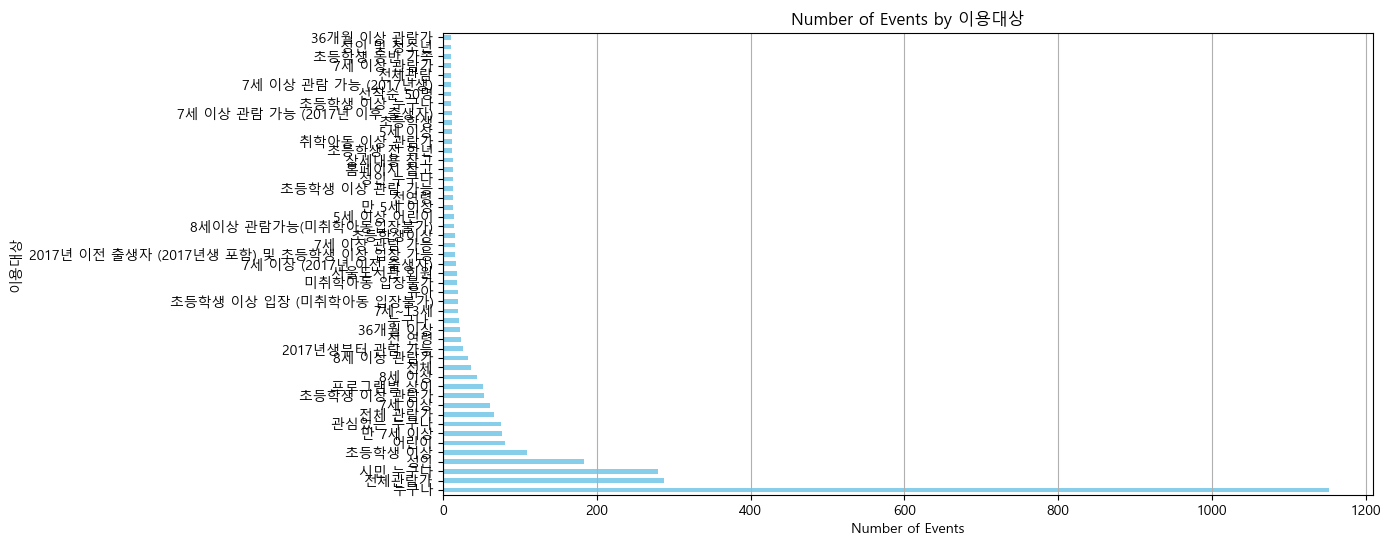

In [159]:
##########
###  판다스_gpt
# https://calmmimiforest.tistory.com/125
plt.figure(figsize=(10,20))
pandasMsg=result2[3] +'결과에 대한 가로 막대그래프를 그려줘, 건수가 10건이상인 자료만'
print('\n-->',pandasMsg)
tmp=df_Ai.chat(pandasMsg)
tmp

##########################
## 일반 gpt(랭체인) 연결
###########################
input_prompt=f'''{pandasMsg}의 결과를 분석하고, 이 자료를 통해 얻을수 있는 인사이트를 최대한 자세하고 다양하게 '''
myPrompt=tmp

langchain_response = chain.run(data_summary=myPrompt, data_prompt=input_prompt)
langchain_response.split('\n')